In [4]:
import torch
import torch.optim as optim
from torch import nn as nn

In [5]:
# Input and output vectors are given. 
inp = [ 0.7300, -1.0400, -1.2300,  1.6700, -0.6300,  1.4300, -0.8400,  0.1500,
         -2.3000,  3.1000, -1.4500, -1.8100,  1.8700, -0.1100, -0.2800,  1.1200,
         -0.4200,  2.8900]
out = [ 1.43,  10.1,  8.3,  1.03,  10.21, -0.1,  8.92,  5.1,
         -7.53, 34.72,  7.61,  3.2,  2.19,  7.15,  7.69, -0.18,
          8.81, 23.1]

t_in = torch.tensor(inp).unsqueeze(1)
t_out = torch.tensor(out).unsqueeze(1)

In [6]:
#Prepare the training and validation datasets: 80% training, 20% validation
n_samples = t_in.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_in_train = t_in[train_indices] 
t_out_train = t_in[train_indices]

t_in_val = t_in[val_indices]
t_out_val = t_out[val_indices]

# train_t_in *= 0.1
# val_t_in *= 0.1

In [7]:
#Create a NN that consists of:
# a linear layer of input size 1 and output size 15, followed by hyperbolic tangent as its activation function
# a linear layer of input size 15 and output size 23, followed by hyperbolic tangent as its activation function
# a linear layer of input size 23 and output size 1
seq_model = nn.Sequential(
    nn.Linear(1, 15),
    nn.Tanh(),
    nn.Linear(15, 23),
    nn.Tanh(),
    nn.Linear(23, 1)
)

# Write a little script that shows the number of parameters in each layer.
# Based on the output of this script, report as a comment in your code how many weights and biases exist in each layer.
for layer in seq_model:
    if isinstance(layer, torch.nn.modules.linear.Linear):
        print("=== NN Layer ===")
        print("\tIn features:", layer.in_features)
        print("\tOut features:", layer.out_features)
        print("\tBias Size: ", layer.bias.shape)
        print("\tBias:", layer.bias)
        ("=========================")
    
    else:
        print("=== Tangent Layer ===")
    print()

# Next, define the training function that receives training and validation datasets, along with a model, loss function, 
# optimizer, and number of epochs. The function must use the model's own parameter handling and the the input loss function
# to automatically calculate the gradient of the loss wrt parameters (autograd), and use optimizer to update the parameters 
# and zero the gradients. 

def training_loop(n_epochs, optimizer, model, loss_fn, t_in_train, t_in_val, t_out_train, t_out_val):
    for epoch in range(1, n_epochs + 1):
        t_pred_train = model(t_in_train)
        loss_train = loss_fn(t_pred_train, t_out_train)
        
        t_pred_val = model(t_out_val)
        loss_val = loss_fn(t_pred_val, t_out_val)
        
        optimizer.zero_grad()
        loss_train.backward()

        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


=== NN Layer ===
	In features: 1
	Out features: 15
	Bias Size:  torch.Size([15])
	Bias: Parameter containing:
tensor([ 0.8277, -0.6094, -0.4160, -0.5221,  0.5129,  0.5007, -0.9407, -0.3816,
        -0.2782,  0.1442, -0.5019, -0.6035,  0.1898,  0.5988, -0.6764],
       requires_grad=True)

=== Tangent Layer ===

=== NN Layer ===
	In features: 15
	Out features: 23
	Bias Size:  torch.Size([23])
	Bias: Parameter containing:
tensor([ 0.1818,  0.1794,  0.2493,  0.1231, -0.0814, -0.1620, -0.0637,  0.0364,
        -0.1346, -0.1587, -0.0261,  0.1166, -0.0177,  0.2348,  0.1926,  0.0507,
        -0.0190,  0.2131,  0.1907,  0.1261, -0.0321,  0.1521,  0.1860],
       requires_grad=True)

=== Tangent Layer ===

=== NN Layer ===
	In features: 23
	Out features: 1
	Bias Size:  torch.Size([1])
	Bias: Parameter containing:
tensor([0.1087], requires_grad=True)



In [8]:
# Train your NN with built-in mean square error loss function and SGD optimizer. 
# Try different learning rates and number of epochs improve the results.
training_loop(
    n_epochs = 3000,
    optimizer = optim.SGD(seq_model.parameters(), lr=1e-3),
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_in_train = t_in_train,
    t_in_val = t_in_val,
    t_out_train = t_out_train,
    t_out_val = t_out_val
)


Epoch 1, Training loss 2.1921, Validation loss 195.7410
Epoch 1000, Training loss 0.0736, Validation loss 152.1766
Epoch 2000, Training loss 0.0548, Validation loss 149.4648
Epoch 3000, Training loss 0.0404, Validation loss 146.9177


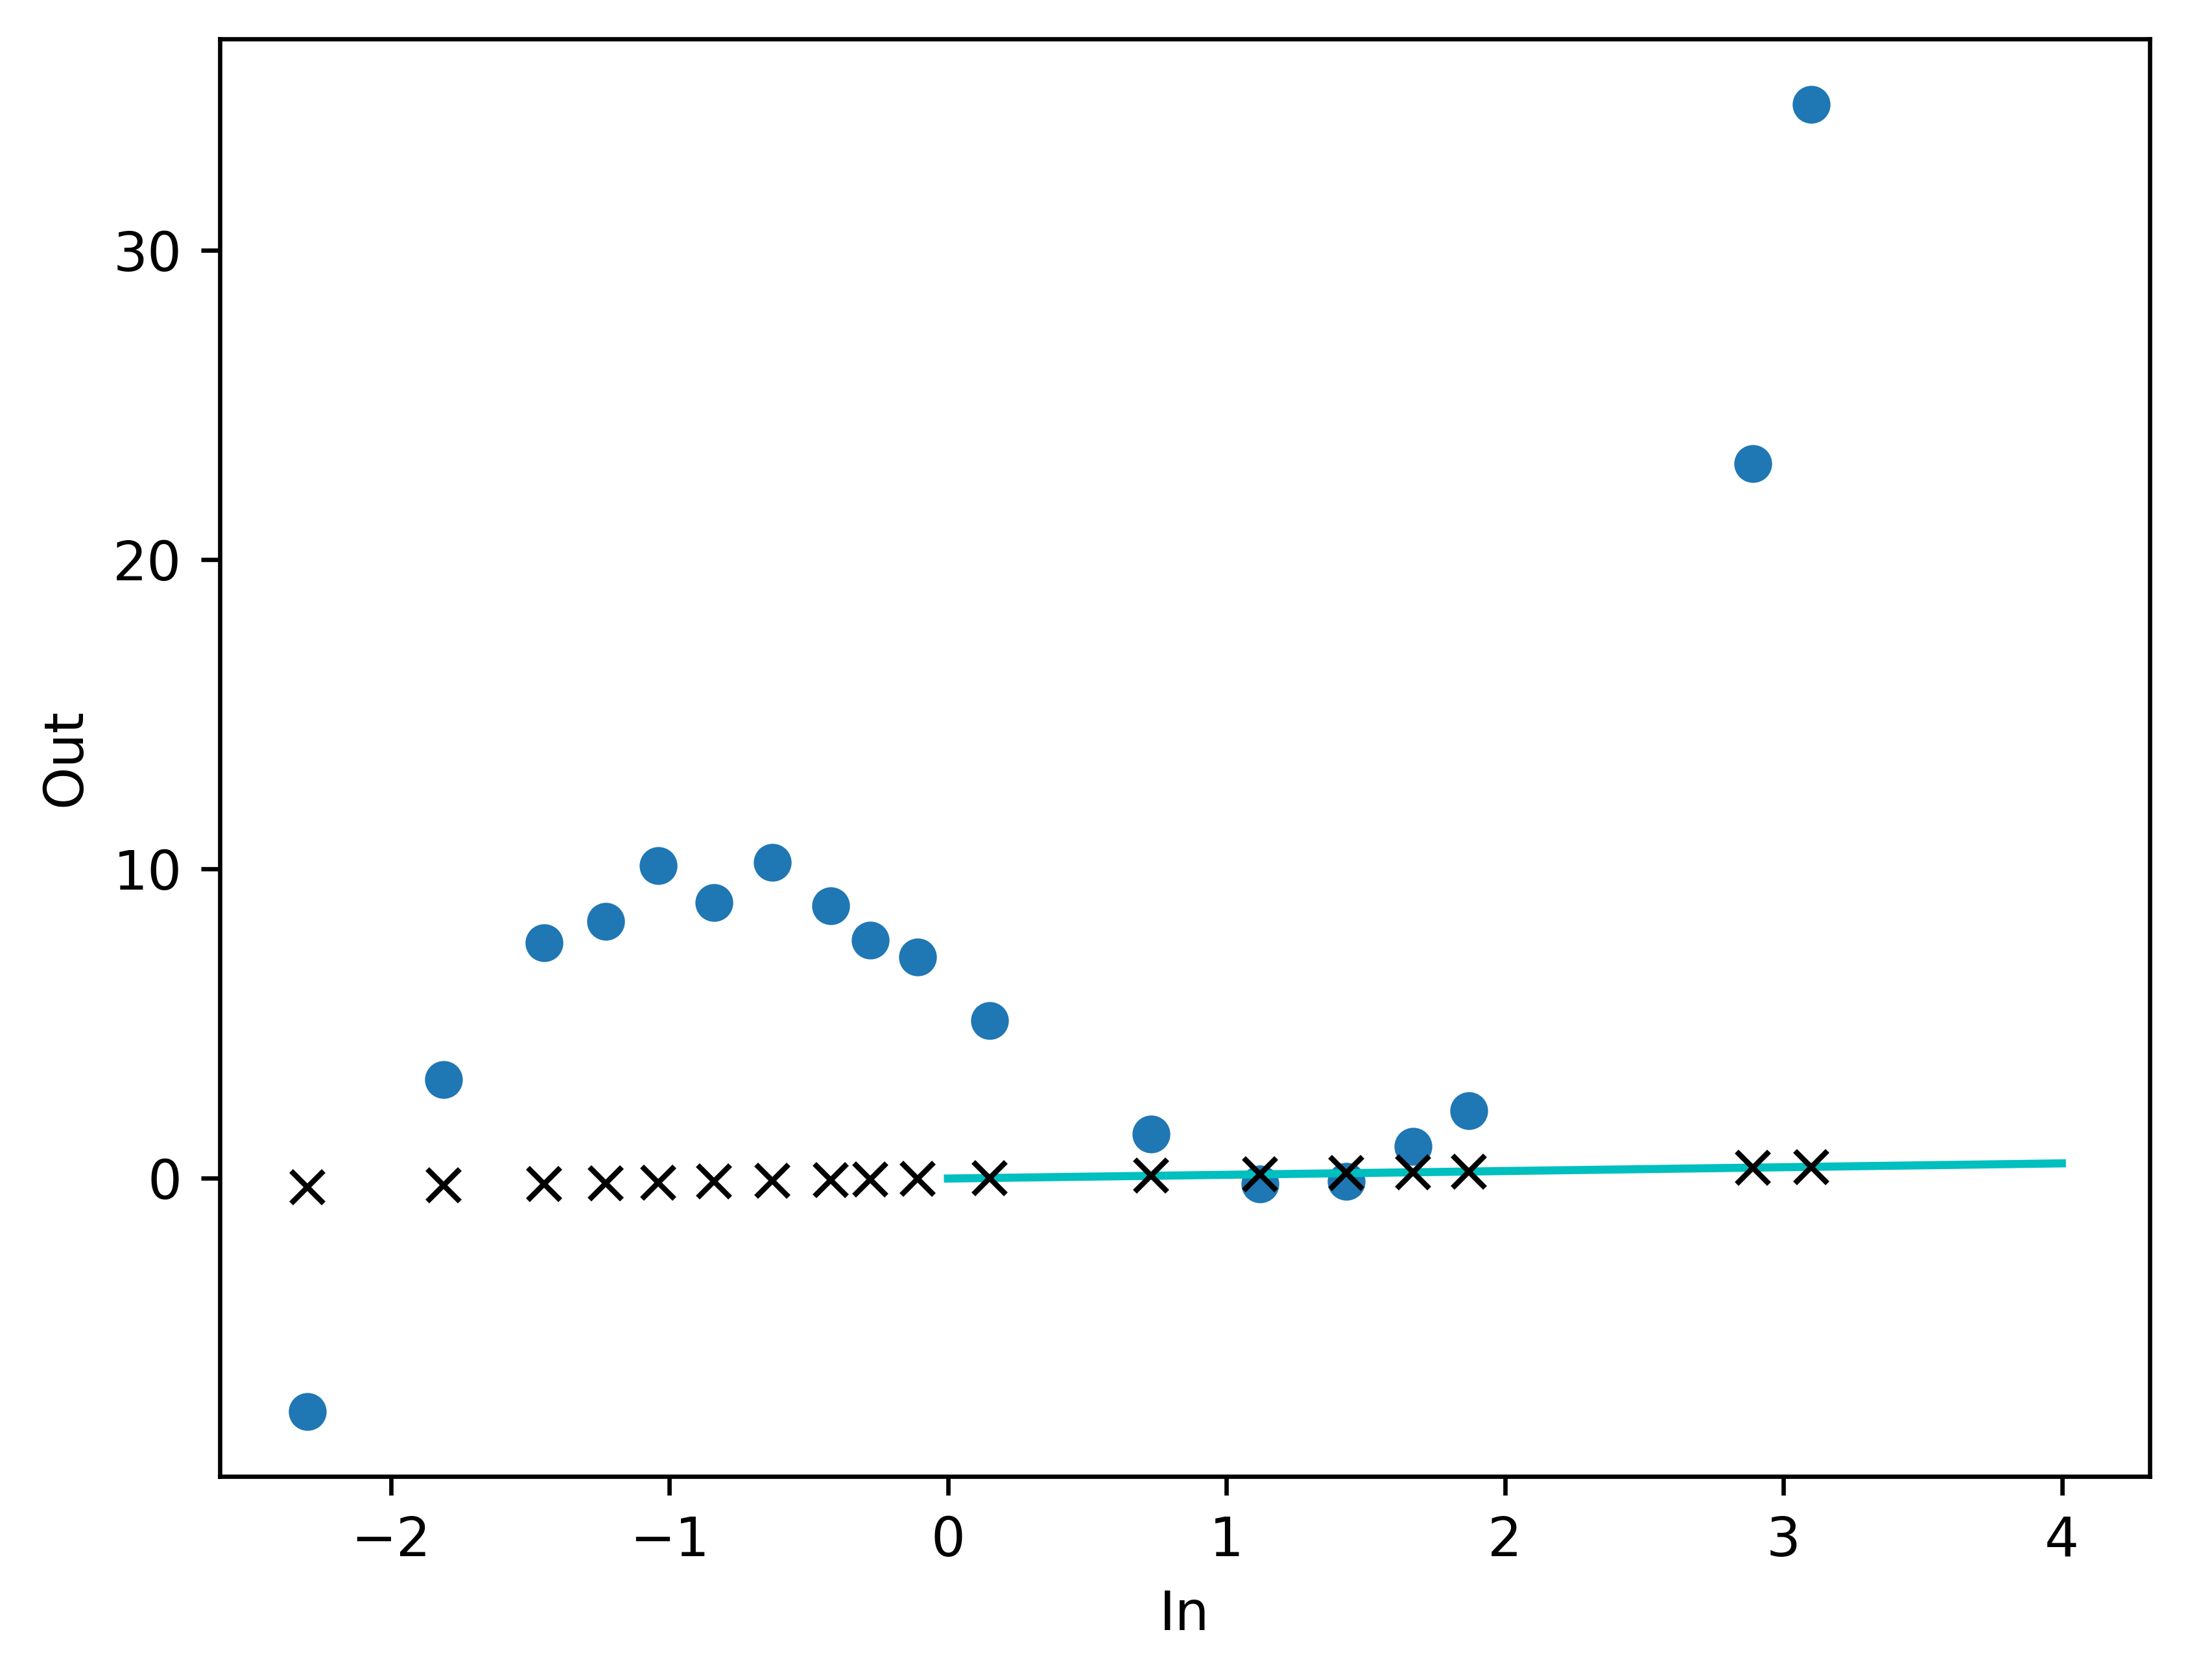

In [9]:
# Plot the trained function.
from matplotlib import pyplot as plt

t_range = torch.arange(0., 5.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("In")
plt.ylabel("Out")
plt.plot(t_in.numpy(), t_out.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_in.numpy(), seq_model(0.1 * t_in).detach().numpy(), 'kx')
